['Setosa' 'Versicolor' 'Virginica']


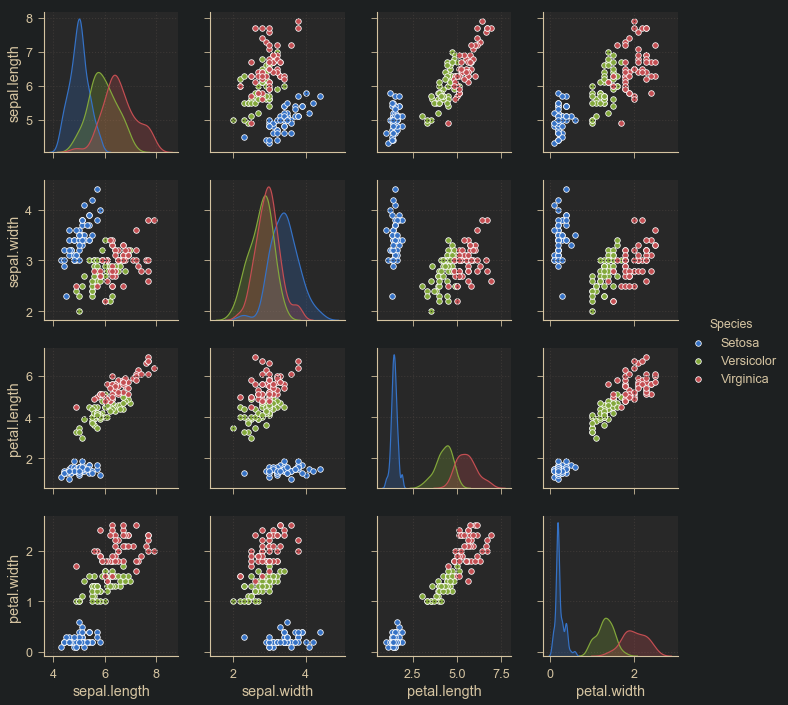

In [63]:
import pandas as pd
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd', context='paper', spines=True, 
             ticks=True, grid=True, gridlines='dotted', figsize=(6,4.5))

data=pd.read_csv("data/iris.csv")
len(data)
data[:5]
print(data['Species'].unique())
import seaborn as sns
sns.pairplot(data, hue='Species')

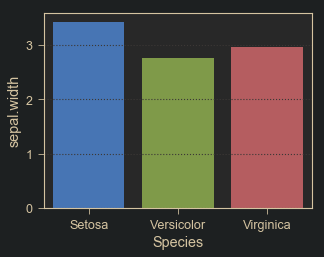

In [64]:
sns.barplot(data['Species'], data['sepal.width'],ci=None)

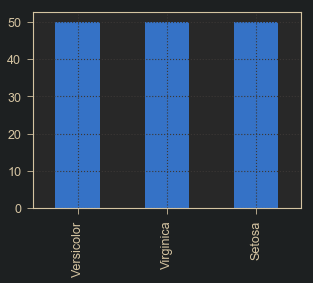

In [65]:
import matplotlib.pyplot as plt
data['Species'].value_counts().plot(kind='bar')

In [66]:
data['Species']=data['Species'].replace(['Setosa','Versicolor','Virginica'],[0,1,2])


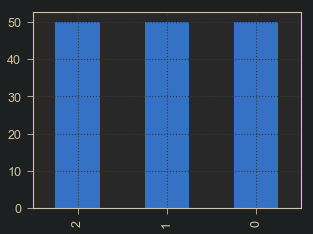

In [67]:
data['Species'].value_counts().plot(kind='bar')

In [68]:
#data.info()
datax=data[['sepal.length', 'sepal.width','petal.length','petal.width']].values
datay=data['Species'].values
print(datax[:5])
print(data[:5])

#datay=

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
   sepal.length  sepal.width  petal.length  petal.width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
(xtrain,xtest, ytrain,ytest)=train_test_split(datax,datay, train_size=0.8, 
                                              random_state=1)

In [71]:
from keras.utils import np_utils
ytrain=np_utils.to_categorical(ytrain)
ytest=np_utils.to_categorical(ytest)


In [72]:
ytrain
ytest

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [73]:
#소프트맥스 회귀
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [81]:
model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
sgd=optimizers.SGD(lr=0.01) #학습률
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(xtrain,ytrain, batch_size=1, epochs=200, 
                  validation_data=(xtest, ytest))

Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 0s 3ms/step - loss: 4.0087 - acc: 0.1833 - val_loss: 2.4950 - val_acc: 0.0000e+00
Epoch 2/200
120/120 [==============================] - 0s 856us/step - loss: 3.0952 - acc: 0.0167 - val_loss: 2.0048 - val_acc: 0.0667
Epoch 3/200
120/120 [==============================] - 0s 806us/step - loss: 2.3333 - acc: 0.0583 - val_loss: 1.5494 - val_acc: 0.1333
Epoch 4/200
120/120 [==============================] - 0s 773us/step - loss: 1.6379 - acc: 0.0583 - val_loss: 1.2134 - val_acc: 0.1667
Epoch 5/200
120/120 [==============================] - 0s 798us/step - loss: 1.1839 - acc: 0.1083 - val_loss: 1.0878 - val_acc: 0.3667
Epoch 6/200
120/120 [==============================] - 0s 765us/step - loss: 1.0131 - acc: 0.3833 - val_loss: 1.0645 - val_acc: 0.2000
Epoch 7/200
120/120 [==============================] - 0s 831us/step - loss: 0.9608 - acc: 0.3833 - val_loss: 1.0429 - val_acc: 0.2000
Epoch 8/

Epoch 61/200
120/120 [==============================] - 0s 773us/step - loss: 0.3615 - acc: 0.9500 - val_loss: 0.3963 - val_acc: 0.8667
Epoch 62/200
120/120 [==============================] - 0s 756us/step - loss: 0.3611 - acc: 0.9250 - val_loss: 0.3795 - val_acc: 0.9333
Epoch 63/200
120/120 [==============================] - 0s 856us/step - loss: 0.3553 - acc: 0.9167 - val_loss: 0.3740 - val_acc: 0.9667
Epoch 64/200
120/120 [==============================] - 0s 798us/step - loss: 0.3526 - acc: 0.9583 - val_loss: 0.3761 - val_acc: 0.9333
Epoch 65/200
120/120 [==============================] - 0s 856us/step - loss: 0.3501 - acc: 0.9500 - val_loss: 0.3685 - val_acc: 0.9667
Epoch 66/200
120/120 [==============================] - 0s 756us/step - loss: 0.3448 - acc: 0.9667 - val_loss: 0.3770 - val_acc: 0.8667
Epoch 67/200
120/120 [==============================] - 0s 856us/step - loss: 0.3465 - acc: 0.9333 - val_loss: 0.3759 - val_acc: 0.8667
Epoch 68/200
120/120 [==========================

120/120 [==============================] - 0s 723us/step - loss: 0.2373 - acc: 0.9500 - val_loss: 0.2745 - val_acc: 0.9333
Epoch 122/200
120/120 [==============================] - 0s 765us/step - loss: 0.2348 - acc: 0.9583 - val_loss: 0.2685 - val_acc: 0.9667
Epoch 123/200
120/120 [==============================] - 0s 931us/step - loss: 0.2339 - acc: 0.9667 - val_loss: 0.2838 - val_acc: 0.9000
Epoch 124/200
120/120 [==============================] - 0s 765us/step - loss: 0.2340 - acc: 0.9667 - val_loss: 0.2702 - val_acc: 0.9333
Epoch 125/200
120/120 [==============================] - 0s 781us/step - loss: 0.2304 - acc: 0.9500 - val_loss: 0.2575 - val_acc: 1.0000
Epoch 126/200
120/120 [==============================] - 0s 756us/step - loss: 0.2294 - acc: 0.9500 - val_loss: 0.2541 - val_acc: 1.0000
Epoch 127/200
120/120 [==============================] - 0s 798us/step - loss: 0.2279 - acc: 0.9500 - val_loss: 0.2536 - val_acc: 1.0000
Epoch 128/200
120/120 [==============================] 

Epoch 181/200
120/120 [==============================] - 0s 731us/step - loss: 0.1767 - acc: 0.9583 - val_loss: 0.2111 - val_acc: 0.9667
Epoch 182/200
120/120 [==============================] - 0s 706us/step - loss: 0.1766 - acc: 0.9583 - val_loss: 0.2068 - val_acc: 1.0000
Epoch 183/200
120/120 [==============================] - 0s 798us/step - loss: 0.1750 - acc: 0.9500 - val_loss: 0.2050 - val_acc: 1.0000
Epoch 184/200
120/120 [==============================] - 0s 665us/step - loss: 0.1726 - acc: 0.9667 - val_loss: 0.1963 - val_acc: 1.0000
Epoch 185/200
120/120 [==============================] - 0s 698us/step - loss: 0.1737 - acc: 0.9500 - val_loss: 0.2016 - val_acc: 1.0000
Epoch 186/200
120/120 [==============================] - 0s 682us/step - loss: 0.1724 - acc: 0.9583 - val_loss: 0.2037 - val_acc: 1.0000
Epoch 187/200
120/120 [==============================] - 0s 723us/step - loss: 0.1749 - acc: 0.9500 - val_loss: 0.2008 - val_acc: 1.0000
Epoch 188/200
120/120 [==================

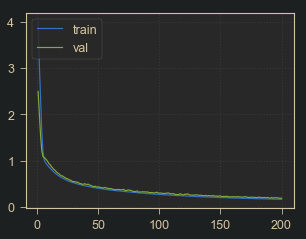

In [82]:
epochs = range(1, len(history.history['acc'])+1) # 모델 생성 과정 출력값 # epoch
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])

plt.legend(['train','val'], loc='upper left')
plt.show()
# history.history['loss']

In [83]:
# print('테스트 정확도 : %.4f' % (model.evaluate(xtest, ytest)[0]))
print('테스트 정확도 : %.4f' % (model.evaluate(xtest, ytest)[1]))

30/30 [==============================] - 0s 67us/step
테스트 정확도 : 1.0000


In [84]:
# 케라스 요약
"""
unique
pairplot 
replace
시각화
train, test 나누어
카테고리화
모델생성
"""

'\nunique\npairplot \nreplace\n시각화\ntrain, test 나누어\n카테고리화\n모델생성\n'

## keras 은닉층 적층
### relu() 활성화 함수


In [85]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation = 'relu', init='uniform')) # 뉴런의 개수 
# x = (1,4), w = (4, 8), b = (1, 8) => y = (1, 8)
model.add(Dense(8, activation = 'relu')) # 입력 : 4 출력 : 8 => H1
# x = (1,8), w = (8, 8), b = (1, 8) => y = (1, 8)
model.add(Dense(3, activation = 'softmax')) # 입력 : 8 출력 : 3 => H2
# x = (1,8), w = (8, 3), b = (1, 3) => y = (1, 3)
# 3개 계층에 대한 최대값 도출 
# [forward propagation => error 통해 => backward propagation]

# 손실함수(cost func) # MSE # (CE) Cross Entropy # 가중치업데이트 시 참조

# random normal : 가우시안 분포형태 난수 생성
# random uniform : 어개 구간으로 나누었을 때 균등하게 난수 생성 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=4, activation="relu", kernel_initializer="uniform")`
  


In [90]:
model.fit(xtrain, ytrain, batch_size = len(xtrain))
# 전체 데이터에 대해서 1에폭메 모든 매개 변수 업뎃 한번 수행 
# batch gradient descent 경사하강법

# 에폭당 시간이 많이 소요된다 

model.fit(xtrain, ytrain, batch_size = 16) 
# mini batch

model.fit(xtrain, ytrain, batch_size = 1) 
# SGD ( 확률적 경사 하강법 ) / 1개씩 하므로 불안정성 잔존

keras.optimizer.SGD(lr = 0.01, momentum = 0.9)

# epoch : 전체 데이터 에 대해서 순전파(체점), 역전파(반성, 피드백)
# 1000개 문제, 100개 단위 채점 . batch size = 100   
# 100개 씩 단위 로 가중치업뎃
# batch 수(iteration) = w updet num
# 1000 / 100 # 전체 1에폭에 해당하는 데이터를 batch size로 나눈다

# SGD = 배치크기 : 1 => 문제하나 풀때 마다, 데이터 하나하나 마다, w updet한다
# 과적합 : 훈련데이터가 적거나, 매개변수가 너무 많을 때 발생빈출
# 1) 훈련 조기종료
# 2) dropout 옵셔닝 : feed_dict(dropout)  : 확률을 줘서 이에 해당하는 data 만 
#         training 하는 것으로 인공신경망이 어느 특정 망에만 적용되지 않도록 하는 기능 
# 특정 뉴런 : 강한 영향 받거나 일부는 받지않아서
# 편향적이지 않은 모델을 형성 생성하기 위한 무작위 선택기법중 1개 
# => 표준화, 정규화작업을 통해 모델생성에 있어 생기는 과적합문제 해결이 가능함.




RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

In [96]:
from keras.preprocessing.text import Tokenizer
t=Tokenizer()
fitText = 'The earth is an awesome place live'

# t.fit_on_texts(fitText) # 문자단위
t.fit_on_texts([fitText]) # 단어단위 # 집합으로 출력되어져 나온다

print(t.word_index)

test = 'The earth is an great place live'
t.texts_to_sequences([test])[0] # corpus 개념 => sequence

{'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


[1, 2, 3, 4, 6, 7]

In [102]:
# 문자열데이터로 하다보면 길이가 다르므로, padding 작업을 통해서 길의를 동일화 시켜준다
# padding : 길이를 동일하게 맞춰주는 작업 (채운다)
# pad_sequence()
from keras.preprocessing.sequence import pad_sequences
print(pad_sequences([[10,20,30],[40,50],[60,70,80,90]], maxlen=5)) # 0으로 채워준다 ( 앞쪽에 )
print(pad_sequences([[10,20,30],[40,50],[60,70,80,90]], maxlen=3))
# 샘플의 크기 : maxlen=5
# maxlen = 3, 일경우, 앞쪽 데이터가 짤린다 
print(pad_sequences([[10,20,30],[40,50],[60,70,80,90]], maxlen=5, padding='post')) # 반대로  옵션

[[ 0  0 10 20 30]
 [ 0  0  0 40 50]
 [ 0 60 70 80 90]]
[[10 20 30]
 [ 0 40 50]
 [70 80 90]]
[[10 20 30  0  0]
 [40 50  0  0  0]
 [60 70 80 90  0]]


In [103]:
# 워드 임베딩 : 단어를 벡터로 변환
# sparse vector = 주로 영이고 소수만 일이므로 벡터의 차원이 너무 크다, = 비효율적 
# one hot vector(=sparse vector)
# 1000 차원 # 10000 차원

# one hot embedding
# 밀집벡터 (dense vector) [0.1 0.5 -1.5 1.8] : 밀집벡터(4차원, 실수)
# n 차원의 sparse vector 가 밀집형이 된다 

# Embedding ( 정수로 된 단어 )
# Embedding ( 단어집합크기, 벡터의 크기, 입력단어 시퀀스길이 )

# Embedding(1000,2) ( 단어가 1000개 로 이루어져있는데 2차원 )
# Embedding(1000,2,3) # 단어의 길이, 벡터의 길이(차원), 입력 시퀀스의 길이 
# text = [['to','you','I']] # 입력단의 시퀀스길이 : "3"
"""
    index      emb
0           [1.5, 3.5]     
...
999         [5.5, 10.8]
"""


'\n    index      emb\n0           [1.5, 3.5]     \n...\n999         [5.5, 10.8]\n'

## keras modeling work

In [ ]:
# Sequential : 층을 구성 => model => model.add()
# 인공신경망을 구성하는 하나의 층 ( => 임베딩 계층 )
"""
ex)
model = Sequential()
model.add(Embedding(voc, size, length))
"""


In [104]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [105]:
# model optimizer + ahepf -
# fit() : 실제학습 
# model.fit(xtrain, ytrain, epochs=10, batch_size=64, validation_data(xval,yval)
# model.evaluate(xtest, ytest, batch_size=32)
model.predict(xinput, batch_size)
model.save('my_model.h5')



NameError: name 'xinput' is not defined

In [111]:
import tensorflow as tf
xdata = [1,2,3]
ydata = [1,2,3]
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
w=tf.Variable(tf.random_normal([1]))
b=tf.Variable(tf.random_normal([1]))

hf= w*x + b
cost = tf.reduce_mean((hf-y)**2)
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
feed = {x:xdata, y:ydata}

saver=tf.train.Saver()

for i in range(2001):
    sess.run(train, feed_dict = feed)
    if i % 20 == 0:
        print(i, sess.run(cost, feed_dict = feed))
        saver.save(sess, 'Model/second, global_step=i'), 
saver.save(sess, 'Model/first')

latest = tf. trai

0 0.09909179


NameError: name 'saver' is not defined

In [114]:
# 함수형 API 신경망 구성
from keras.layers import Input, Dense
from keras.models import Model # 객체 생성시 
inputs=Input(shape=(10,)) # 입력 10개
h1 = Dense(64, activation = 'relu')(inputs)
h2 = Dense(64, activation = 'relu')(h1)
output = Dense(1, activation = 'sigmoid')(h2)
model = Model(inputs=inputs, outputs=output)

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', 
              metrics=['accuracy'])
# model.fit(데이터, 레이블)

# corpus 에 등장하는 단어 - vocabulary 

## RNN


In [ ]:
순서 데이터 

